<a href="https://colab.research.google.com/github/CansecoSergio/python-data-science/blob/main/M6%20Sergio%20Canseco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Reto M6 Sergio Augusto Canseco Sánchez**

Instalación de paquetes y lectura del archivo

In [924]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#Graficas
# ==============================================================================
import matplotlib.pyplot as plt

In [925]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [926]:
employees_df = pd.read_csv("/content/drive/MyDrive/Archivos Collab/M6/Employees_M6.csv");
employees_df.head(2)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670


## Tema 1: Familiarización y limpieza de datos

1.1 Familiarizarse con los datos, analizar las variables y la información
planteada.

In [927]:
employees_df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827


In [928]:
employees_df.tail()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,1,2,6.0,type3,3.0,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,0,2,4.0,type3,3.0,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,1,2,3.0,type2,4.0,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,1,5,8.0,type0,2.0,0.4162
6999,EID_1640,F,58.0,3,Married,Franklin,IT,Directive,22.0,2,74,0,4,5.0,type2,3.0,0.0910


In [929]:
employees_df.shape

(7000, 17)

In [930]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

1.2 Detectar valores perdidos, decidir y aplicar la técnica apropiada para
imputar valores.

In [931]:
#Número de datos y valores faltantes
pd.isna(employees_df).sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
Attrition_rate                 0
dtype: int64

In [932]:
#Se imputan los valores faltantes a la columna Age
#Ya que son valores enteros y no hay edades representadas con decimales en la muestra se utiliza la mediana
employees_df['Age'].fillna(employees_df['Age'].median(), inplace=True)

In [933]:
#Se imputan los valores faltantes a la columna Time_of_service
#Ya que son valores enteros y no hay valores representados con decimales en la muestra se utiliza la mediana
employees_df['Time_of_service'].fillna(employees_df['Time_of_service'].median(), inplace=True)

In [934]:
#Se imputan los valores faltantes a la columna Pay_Scale
#Ya que son valores enteros y estan en un rango se utiliza la mediana
employees_df['Pay_Scale'].fillna(employees_df['Pay_Scale'].median(), inplace=True)

In [935]:
#Se imputan los valores faltantes a la columna Work_Life_balance
#Ya que son valores enteros y estan en un rango se utiliza la mediana
employees_df['Work_Life_balance'].fillna(employees_df['Work_Life_balance'].median(), inplace=True)

In [936]:
pd.isna(employees_df).sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
Attrition_rate               0
dtype: int64

## Tema 2: Tratamiento de variables de ingeniería de características

2.1 Detectar valores atípicos, decidir y aplicar la transformación apropiada
para transformar la variable con valores atípicos.

In [937]:
employees_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7000.0,39.468429,13.214784,19.0,28.0000,37.00000,51.000,65.0000
Education_Level,7000.0,3.187857,1.065102,1.0,3.0000,3.00000,4.000,5.0000
Time_of_service,7000.0,13.315429,10.268266,0.0,5.0000,10.00000,20.000,43.0000
Time_since_promotion,7000.0,2.367143,1.149395,0.0,1.0000,2.00000,3.000,4.0000
growth_rate,7000.0,47.064286,15.761406,20.0,33.0000,47.00000,61.000,74.0000
Travel_Rate,7000.0,0.817857,0.648205,0.0,0.0000,1.00000,1.000,2.0000
Post_Level,7000.0,2.798000,1.163721,1.0,2.0000,3.00000,3.000,5.0000
Pay_Scale,7000.0,6.006286,2.057112,1.0,5.0000,6.00000,8.000,10.0000
Work_Life_balance,7000.0,2.387286,1.122009,1.0,1.0000,2.00000,3.000,5.0000
Attrition_rate,7000.0,0.189376,0.185753,0.0,0.0704,0.14265,0.235,0.9959


<Axes: >

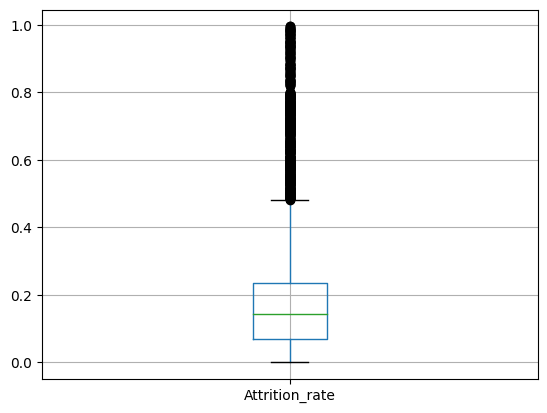

In [938]:
boxplot = employees_df.boxplot(column='Attrition_rate')
boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

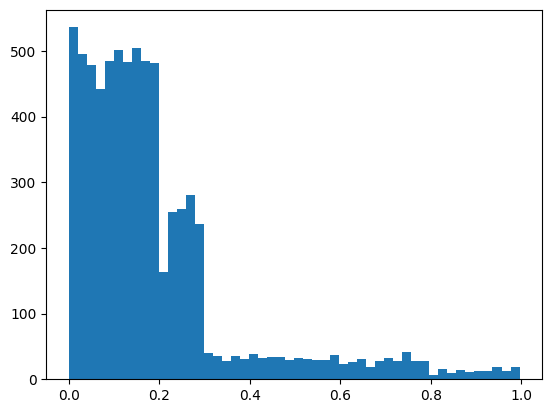

In [939]:
plt.hist(employees_df['Attrition_rate'], bins=50)
plt.show

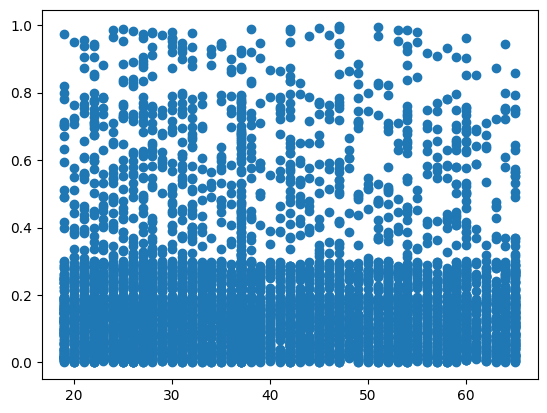

In [940]:
plt.scatter(x=employees_df.Age, y= employees_df.Attrition_rate)

In [941]:
#Sesgo
employees_df['Attrition_rate'].skew()

2.056875960544357

(array([374., 361., 355., 354., 326., 348., 366., 396., 373., 382., 400.,
        401., 389., 141., 221., 231., 244., 230., 218.,  15.,  33.,  29.,
         32.,  33.,  33.,  36.,  34.,  30.,  35.,  31.,  34.,  32.,  33.,
         40.,  25.,  29.,  31.,  25.,  39.,  36.,  46.,  36.,  19.,  15.,
         14.,  18.,  15.,  19.,  19.,  24.]),
 array([0.        , 0.0138219 , 0.0276438 , 0.0414657 , 0.05528761,
        0.06910951, 0.08293141, 0.09675331, 0.11057521, 0.12439711,
        0.13821902, 0.15204092, 0.16586282, 0.17968472, 0.19350662,
        0.20732852, 0.22115042, 0.23497233, 0.24879423, 0.26261613,
        0.27643803, 0.29025993, 0.30408183, 0.31790374, 0.33172564,
        0.34554754, 0.35936944, 0.37319134, 0.38701324, 0.40083514,
        0.41465705, 0.42847895, 0.44230085, 0.45612275, 0.46994465,
        0.48376655, 0.49758846, 0.51141036, 0.52523226, 0.53905416,
        0.55287606, 0.56669796, 0.58051986, 0.59434177, 0.60816367,
        0.62198557, 0.63580747, 0.64962937, 0.

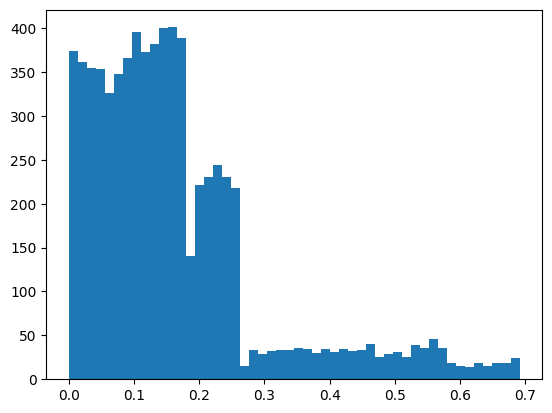

In [942]:
#Para reducir el sesgo aplicamos el logaritmo
employees_df['log+1'] = (employees_df['Attrition_rate'] + 1).transform(np.log)
plt.hist(employees_df['log+1'], bins=50)

<Axes: >

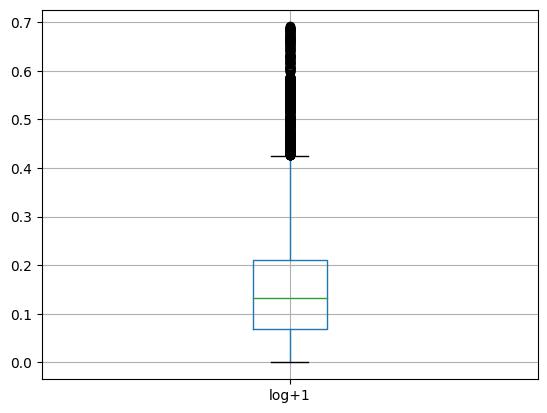

In [943]:
boxplot = employees_df.boxplot(column='log+1')
boxplot

**No considero que sea necesario realizar operaciones para reducir información por valores atípicos, ya que analizándola veo que no hay datos que salgan del rango normal**

2.2 Utilizar One Hot encoding para las variables que consideren necesarias.

In [944]:
employees_df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate,log+1
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841,0.168983
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670,0.064851
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851,0.081672
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668,0.064664
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827,0.167800


In [945]:
#Eliminamos la columna de ID ya que no servirá para generar estadísticas relevantes
employees_df = employees_df.drop(['Employee_ID'], axis=1)

In [946]:
#Se realiza One Hot Encoding para la columna Gender
employees_df = pd.get_dummies(employees_df, columns=['Gender'], dtype=int)
employees_df = employees_df.drop(['Gender_F'], axis=1)

In [947]:
#Se realiza One Hot Encoding para la columna Education_Level
employees_df = pd.get_dummies(employees_df, columns=['Education_Level'], dtype=int)
employees_df = employees_df.drop(['Education_Level_1'], axis=1)

In [948]:
#Se realiza One Hot Encoding para la columna Relationship_Status
employees_df = pd.get_dummies(employees_df, columns=['Relationship_Status'], dtype=int)
employees_df = employees_df.drop(['Relationship_Status_Married'], axis=1)

In [949]:
#Se realiza One Hot Encoding para la columna Hometown
employees_df = pd.get_dummies(employees_df, columns=['Hometown'], dtype=int)
employees_df = employees_df.drop(['Hometown_Clinton'], axis=1)

In [950]:
#Se realiza One Hot Encoding para la columna Unit
employees_df = pd.get_dummies(employees_df, columns=['Unit'], dtype=int)
employees_df = employees_df.drop(['Unit_Accounting and Finance'], axis=1)

In [951]:
#Se realiza One Hot Encoding para la columna Decision_skill_possess
employees_df = pd.get_dummies(employees_df, columns=['Decision_skill_possess'], dtype=int)
employees_df = employees_df.drop(['Decision_skill_possess_Analytical'], axis=1)

In [952]:
#Se realiza One Hot Encoding para la columna Pay_Scale
employees_df = pd.get_dummies(employees_df, columns=['Post_Level'], dtype=int)
employees_df = employees_df.drop(['Post_Level_1'], axis=1)

In [953]:
#Se realiza One Hot Encoding para la columna Compensation_and_Benefits
employees_df = pd.get_dummies(employees_df, columns=['Compensation_and_Benefits'], dtype=int)
employees_df = employees_df.drop(['Compensation_and_Benefits_type0'], axis=1)

In [954]:
employees_df.head(5)

,Age,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Pay_Scale,Work_Life_balance,Attrition_rate,log+1,Gender_M,...,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,42.0,4.0,4,33,1,7.0,3.0,0.1841,0.168983,0,...,1,0,0,0,0,0,0,1,0,0
1,24.0,5.0,4,36,0,6.0,4.0,0.0670,0.064851,1,...,0,0,0,1,0,0,0,1,0,0
2,58.0,27.0,3,51,0,8.0,1.0,0.0851,0.081672,0,...,1,0,1,0,0,0,0,1,0,0
3,26.0,4.0,3,56,1,8.0,1.0,0.0668,0.064664,0,...,0,0,0,1,0,0,0,1,0,0
4,31.0,5.0,4,62,1,2.0,3.0,0.1827,0.167800,0,...,1,0,0,1,0,0,0,0,1,0


In [955]:
employees_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7000.0,39.468429,13.214784,19.0,28.000000,37.00000,51.000000,65.000000
Time_of_service,7000.0,13.315429,10.268266,0.0,5.000000,10.00000,20.000000,43.000000
Time_since_promotion,7000.0,2.367143,1.149395,0.0,1.000000,2.00000,3.000000,4.000000
growth_rate,7000.0,47.064286,15.761406,20.0,33.000000,47.00000,61.000000,74.000000
Travel_Rate,7000.0,0.817857,0.648205,0.0,0.000000,1.00000,1.000000,2.000000
Pay_Scale,7000.0,6.006286,2.057112,1.0,5.000000,6.00000,8.000000,10.000000
Work_Life_balance,7000.0,2.387286,1.122009,1.0,1.000000,2.00000,3.000000,5.000000
Attrition_rate,7000.0,0.189376,0.185753,0.0,0.070400,0.14265,0.235000,0.995900
log+1,7000.0,0.163060,0.138615,0.0,0.068032,0.13335,0.211071,0.691095
Gender_M,7000.0,0.412286,0.492281,0.0,0.000000,0.00000,1.000000,1.000000


In [956]:
#Se dividen las variables categoricas
categoricas = employees_df.loc[:, 'Gender_M':]
categoricas.head(3)

,Gender_M,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,...,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Post_Level_2,Post_Level_3,Post_Level_4,Post_Level_5,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [957]:
#Se dividen las variables con la variable a ser observada
salida = employees_df.loc[:, 'Attrition_rate':'log+1']
salida.head(3)

,Attrition_rate,log+1
0,0.1841,0.168983
1,0.0670,0.064851
2,0.0851,0.081672


In [958]:
#Se dividen las variables numericas
numericas_tmp = employees_df.drop(categoricas.columns.values.tolist(), axis = 1)
numericas_tmp = numericas_tmp.drop(salida.columns.values.tolist(), axis = 1)
numericas_tmp.head(3)

,Age,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Pay_Scale,Work_Life_balance
0,42.0,4.0,4,33,1,7.0,3.0
1,24.0,5.0,4,36,0,6.0,4.0
2,58.0,27.0,3,51,0,8.0,1.0


In [959]:
# Estandarización
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(numericas_tmp)
scaled

array([[ 0.19158484, -0.90727044,  1.42072449, ...,  0.28101584,
         0.48309742,  0.54612586],
       [-1.17062324, -0.80987606,  1.42072449, ..., -1.2618162 ,
        -0.00305582,  1.43744808],
       [ 1.40243646,  1.33280043,  0.5506395 , ..., -1.2618162 ,
         0.96925066, -1.23651858],
       ...,
       [ 0.72133242, -0.32290413, -1.18953047, ...,  0.28101584,
        -1.46151554,  1.43744808],
       [ 0.56997597,  1.04061727, -1.18953047, ...,  0.28101584,
         0.96925066, -0.34519636],
       [ 1.40243646,  0.8458285 , -0.31944549, ..., -1.2618162 ,
        -0.48920906,  0.54612586]])

In [960]:
numericas = pd.DataFrame(scaled)
numericas.columns = numericas_tmp.columns.values.tolist()
numericas

,Age,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Pay_Scale,Work_Life_balance
0,0.191585,-0.907270,1.420724,-0.892388,0.281016,0.483097,0.546126
1,-1.170623,-0.809876,1.420724,-0.702036,-1.261816,-0.003056,1.437448
2,1.402436,1.332800,0.550639,0.249724,-1.261816,0.969251,-1.236519
3,-1.019267,-0.907270,0.550639,0.566977,0.281016,0.969251,-1.236519
4,-0.640876,-0.809876,1.420724,0.947681,0.281016,-1.947669,0.546126
...,...,...,...,...,...,...,...
6995,-1.246301,-0.907270,-1.189530,-1.717246,0.281016,-0.003056,0.546126
6996,0.342941,0.261462,-0.319445,0.757329,-1.261816,-0.975362,0.546126
6997,0.721332,-0.322904,-1.189530,0.757329,0.281016,-1.461516,1.437448
6998,0.569976,1.040617,-1.189530,-1.653796,0.281016,0.969251,-0.345196


In [961]:
numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7000.0,-2.593481e-16,1.000071,-1.549014,-0.867910,-0.186806,0.872689,1.932184
Time_of_service,7000.0,7.003921e-17,1.000071,-1.296848,-0.809876,-0.322904,0.651040,2.891111
Time_since_promotion,7000.0,8.932537e-17,1.000071,-2.059615,-1.189530,-0.319445,0.550639,1.420724
growth_rate,7000.0,-1.537817e-16,1.000071,-1.717246,-0.892388,-0.004079,0.884230,1.709089
Travel_Rate,7000.0,0.000000e+00,1.000071,-1.261816,-1.261816,0.281016,0.281016,1.823848
Pay_Scale,7000.0,2.182381e-17,1.000071,-2.433822,-0.489209,-0.003056,0.969251,1.941557
Work_Life_balance,7000.0,-1.563194e-16,1.000071,-1.236519,-1.236519,-0.345196,0.546126,2.328770


2.3 Detectar si hay variables que utilizan la técnica de binning o de
agrupamiento.

In [962]:
#Es posible generar un agrupado por sexo para determinar estadísticas
grouped = employees_df.groupby('Gender_M')
grouped

In [963]:
#Por ejemplo el total de tiempo de servicio por sexo
sum = grouped['Time_of_service'].sum().add_suffix('sum_')
#Por ejemplo el promedio de edad por sexo
avg = grouped['Age'].mean().add_suffix('mean_')

new_df = pd.concat([sum, avg], axis = 1)
new_df

,Time_of_service,Age
Gender_M,,
0sum_,54788.0,NaN
1sum_,38420.0,NaN
0mean_,NaN,39.456004
1mean_,NaN,39.486140


## Tema 3: Reducción de dimensionalidad

3.1 Aplicar ambas técnicas de reducción de dimensionalidad (PCA y FA).

##**PCA**

In [964]:
pca_model = PCA(n_components = 7) #El numeri de variables numericas que se tiene

In [965]:
pca_model.fit(numericas)

PCA(n_components=7)

In [966]:
pca_model.components_

array([[ 0.6919872 ,  0.69135226,  0.2064149 ,  0.0012198 ,  0.00863787,
         0.02234968, -0.00174657],
       [ 0.02519915,  0.01550405, -0.07875064, -0.30808758,  0.28583742,
        -0.57145748,  0.69981306],
       [-0.01846586, -0.03071493,  0.18401209,  0.73025543,  0.47303316,
        -0.41503993, -0.18858325],
       [ 0.05339553,  0.05512128, -0.44084793, -0.16848574,  0.76578014,
         0.41882033, -0.09770632],
       [ 0.01477139,  0.01302877, -0.13598634,  0.55506403, -0.12897646,
         0.46685322,  0.66214563],
       [ 0.1291134 ,  0.13498351, -0.83932507,  0.18789716, -0.30227324,
        -0.32753526, -0.16336708],
       [-0.70741655,  0.70669628,  0.00500122,  0.00432345,  0.00622227,
        -0.00607912,  0.00477695]])

In [967]:
#Se combierte el array a dataframe para añadir nombres a los ejes. #vector de loadings, cargas
pd.DataFrame(
    data    = pca_model.components_,
    columns = numericas.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
)

,Age,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Pay_Scale,Work_Life_balance
PC1,0.691987,0.691352,0.206415,0.001220,0.008638,0.022350,-0.001747
PC2,0.025199,0.015504,-0.078751,-0.308088,0.285837,-0.571457,0.699813
PC3,-0.018466,-0.030715,0.184012,0.730255,0.473033,-0.415040,-0.188583
PC4,0.053396,0.055121,-0.440848,-0.168486,0.765780,0.418820,-0.097706
PC5,0.014771,0.013029,-0.135986,0.555064,-0.128976,0.466853,0.662146
PC6,0.129113,0.134984,-0.839325,0.187897,-0.302273,-0.327535,-0.163367
PC7,-0.707417,0.706696,0.005001,0.004323,0.006222,-0.006079,0.004777


In [968]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.27462448 0.42166256 0.5668347  0.70958291 0.84807519 0.98296388
 1.        ]


In [969]:
pca_model.explained_variance_ratio_

array([0.27462448, 0.14703808, 0.14517215, 0.14274821, 0.13849228,
       0.13488869, 0.01703612])

In [970]:
proyecciones = np.dot(pca_model.components_, scale(numericas).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
proyecciones = proyecciones.transpose().set_index(numericas.index)
proyecciones

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.190228,0.340253,-0.536477,-0.151582,-0.146616,-1.790251,-0.772027
1,-1.091042,0.709367,-1.071435,-1.723189,0.502400,-1.437241,0.258886
2,2.018790,-1.844188,-0.549120,-0.575990,-0.101699,0.211692,-0.066038
3,-1.191962,-1.596685,0.525889,0.299244,-0.189550,-0.810101,0.075036
4,-0.751029,1.142963,1.828489,-1.518742,-0.271099,-0.742681,-0.091570
...,...,...,...,...,...,...,...
6995,-1.735894,1.041524,-1.390828,0.857733,-0.497708,0.219195,0.231492
6996,0.319407,0.383418,0.184841,-1.382184,0.541287,1.101650,-0.055465
6997,-0.001448,1.794987,0.799192,-0.119844,0.821816,1.349172,-0.723653
6998,0.890988,-0.081447,-1.673319,1.545703,-0.546542,0.555703,0.313298


In [971]:
#Se genera el primer conjunto correspondiente a PCA
#Se elije la varianza acumulada de 6 elementtos para un 90%
#Se genera el primer conjunto con ese 6 elementos
conjunto_1_PCA = proyecciones[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]
conjunto_1_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.190228,0.340253,-0.536477,-0.151582,-0.146616,-1.790251
1,-1.091042,0.709367,-1.071435,-1.723189,0.502400,-1.437241
2,2.018790,-1.844188,-0.549120,-0.575990,-0.101699,0.211692
3,-1.191962,-1.596685,0.525889,0.299244,-0.189550,-0.810101
4,-0.751029,1.142963,1.828489,-1.518742,-0.271099,-0.742681


In [972]:
conjunto_1_PCA = pd.concat([categoricas, conjunto_1_PCA, salida], axis = 1)
conjunto_1_PCA

,Gender_M,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,...,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,PC1,PC2,PC3,PC4,PC5,PC6,Attrition_rate,log+1
0,0,0,0,1,0,0,1,0,0,0,...,0,0,-0.190228,0.340253,-0.536477,-0.151582,-0.146616,-1.790251,0.1841,0.168983
1,1,0,1,0,0,1,0,0,1,0,...,0,0,-1.091042,0.709367,-1.071435,-1.723189,0.502400,-1.437241,0.0670,0.064851
2,0,0,1,0,0,0,0,0,0,0,...,0,0,2.018790,-1.844188,-0.549120,-0.575990,-0.101699,0.211692,0.0851,0.081672
3,0,0,1,0,0,1,0,1,0,0,...,0,0,-1.191962,-1.596685,0.525889,0.299244,-0.189550,-0.810101,0.0668,0.064664
4,0,0,0,0,0,0,0,0,1,0,...,1,0,-0.751029,1.142963,1.828489,-1.518742,-0.271099,-0.742681,0.1827,0.167800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,0,0,0,1,0,1,0,0,0,...,1,0,-1.735894,1.041524,-1.390828,0.857733,-0.497708,0.219195,0.7839,0.578802
6996,0,0,0,0,0,0,0,1,0,0,...,1,0,0.319407,0.383418,0.184841,-1.382184,0.541287,1.101650,0.1055,0.100298
6997,0,0,1,0,0,1,0,0,1,0,...,0,0,-0.001448,1.794987,0.799192,-0.119844,0.821816,1.349172,0.7847,0.579250
6998,0,0,1,0,0,0,0,0,0,1,...,0,0,0.890988,-0.081447,-1.673319,1.545703,-0.546542,0.555703,0.4162,0.347977


## **-----------------------------**

## **FA**

In [973]:
!pip install factor_analyzer

In [974]:
from factor_analyzer import FactorAnalyzer

In [975]:
#Se realiza la prueba de Barlett para saber si utilizar FA es buena opción
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(scaled)
chi_square_value, p_value

#Ya que el valor es menor a 0.05 si pasa la prueba de barlett

(10614.19637818883, 0.0)

In [976]:
scaled

array([[ 0.19158484, -0.90727044,  1.42072449, ...,  0.28101584,
         0.48309742,  0.54612586],
       [-1.17062324, -0.80987606,  1.42072449, ..., -1.2618162 ,
        -0.00305582,  1.43744808],
       [ 1.40243646,  1.33280043,  0.5506395 , ..., -1.2618162 ,
         0.96925066, -1.23651858],
       ...,
       [ 0.72133242, -0.32290413, -1.18953047, ...,  0.28101584,
        -1.46151554,  1.43744808],
       [ 0.56997597,  1.04061727, -1.18953047, ...,  0.28101584,
         0.96925066, -0.34519636],
       [ 1.40243646,  0.8458285 , -0.31944549, ..., -1.2618162 ,
        -0.48920906,  0.54612586]])

In [977]:
# Se crea un análisis factorial sin especificaciones de factores para poder extraer
# los valores de los eigenvalores y determinar el número de factores a utilizar
fa = FactorAnalyzer()
fa.fit(scaled)
# Revision Eigenvalues
ev, v= fa.get_eigenvalues()
ev

array([1.92237133, 1.02926655, 1.01620502, 0.99923745, 0.96944595,
       0.94422085, 0.11925284])

In [978]:
#Se realiza el primer caso con los valores >= 1
fa = FactorAnalyzer(n_factors = 4)
fa.fit(scaled)

FactorAnalyzer(n_factors=4, rotation_kwargs={})

In [979]:
fa.loadings_

array([[ 0.90611524,  0.07889826,  0.02994277,  0.07496102],
       [ 0.9589389 ,  0.05422142,  0.01826875,  0.01746515],
       [ 0.05086654,  0.4313646 ,  0.01252017, -0.07960514],
       [-0.00630218,  0.02468238, -0.04873904,  0.06166023],
       [ 0.02658634, -0.05437091, -0.00166234,  0.15950429],
       [ 0.01658818, -0.02234095, -0.05395037, -0.08281679],
       [ 0.01538701,  0.01259125,  0.39485313,  0.02744671]])

In [980]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
fa_caso_1 = pd.DataFrame(
    data    = fa.loadings_,
    columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4'],
    index   = pd.DataFrame(scaled).columns
)

fa_caso_1

,Factor1,Factor2,Factor3,Factor4
0,0.906115,0.078898,0.029943,0.074961
1,0.958939,0.054221,0.018269,0.017465
2,0.050867,0.431365,0.012520,-0.079605
3,-0.006302,0.024682,-0.048739,0.061660
4,0.026586,-0.054371,-0.001662,0.159504
5,0.016588,-0.022341,-0.053950,-0.082817
6,0.015387,0.012591,0.394853,0.027447


In [981]:
#Se realiza el primer caso con los valores >= 1
fa2 = FactorAnalyzer(n_factors = 6)
fa2.fit(scaled)

FactorAnalyzer(n_factors=6, rotation_kwargs={})

In [982]:
fa2.loadings_

array([[ 8.76051308e-01,  1.04634446e-01,  7.54640565e-02,
         7.69761581e-02,  7.19441539e-02,  2.59089879e-03],
       [ 9.92756288e-01, -8.65635924e-02, -6.24759962e-02,
        -6.37403906e-02, -5.95208115e-02, -2.14658710e-03],
       [ 4.67384169e-02,  2.00979233e-01, -5.33695822e-03,
        -1.42768329e-02, -4.27135170e-03,  8.01717760e-03],
       [ 2.98863191e-04, -4.74720310e-04, -3.45694583e-04,
        -2.19553072e-04, -3.28454995e-04,  1.62471505e-01],
       [ 1.86914929e-03, -2.99386099e-03, -2.43596064e-03,
         1.67874092e-01, -2.05703335e-03,  5.94387538e-06],
       [ 2.57032756e-03, -4.15771119e-03,  1.89979899e-01,
        -3.17041067e-03, -2.78280098e-03, -1.09566191e-04],
       [ 2.40584151e-03, -3.93047763e-03, -4.76016801e-02,
        -2.82553277e-03,  1.46326124e-01, -3.15800484e-02]])

In [983]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
fa_caso_2 = pd.DataFrame(
    data    = fa2.loadings_,
    columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'],
    index   = pd.DataFrame(scaled).columns
)

fa_caso_2

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
0,0.876051,0.104634,0.075464,0.076976,0.071944,0.002591
1,0.992756,-0.086564,-0.062476,-0.063740,-0.059521,-0.002147
2,0.046738,0.200979,-0.005337,-0.014277,-0.004271,0.008017
3,0.000299,-0.000475,-0.000346,-0.000220,-0.000328,0.162472
4,0.001869,-0.002994,-0.002436,0.167874,-0.002057,0.000006
5,0.002570,-0.004158,0.189980,-0.003170,-0.002783,-0.000110
6,0.002406,-0.003930,-0.047602,-0.002826,0.146326,-0.031580


In [984]:
# Primer escenario
fa.get_factor_variance()

(array([1.74445452, 0.19946339, 0.16258497, 0.04911671]),
 array([0.24920779, 0.02849477, 0.02322642, 0.00701667]),
 array([0.24920779, 0.27770256, 0.30092898, 0.30794565]))

In [985]:
# Primer escenario
fa2.get_factor_variance()

(array([1.7552314 , 0.0588762 , 0.04799089, 0.03839179, 0.03016035,
        0.0274699 ]),
 array([0.25074734, 0.00841089, 0.00685584, 0.00548454, 0.00430862,
        0.00392427]),
 array([0.25074734, 0.25915823, 0.26601407, 0.27149861, 0.27580723,
        0.2797315 ]))

In [986]:
#De acuerdo a las varianzas, nos quedamos con el primer escenario ya que explica más que el segundo
datos_fa = pd.DataFrame(fa.transform(scaled))
datos_fa.columns = ['Factor_0', 'Factor_1', 'Factor_2', 'Factor_3']
datos_fa

,Factor_0,Factor_1,Factor_2,Factor_3
0,-0.641184,0.570168,0.241956,0.351845
1,-0.932164,0.288694,0.571149,-0.172702
2,1.358692,0.442770,-0.597962,-0.283825
3,-0.930273,0.058724,-0.534870,0.008418
4,-0.814170,0.558616,0.239898,0.433481
...,...,...,...,...
6995,-0.969620,-0.761511,0.354473,-0.169115
6996,0.278576,-0.008102,0.223286,-0.034604
6997,-0.052855,-0.239922,0.657414,0.474333
6998,0.952130,-0.492347,-0.110968,-0.394541


In [987]:
conjunto_2_FA = pd.concat([categoricas, datos_fa, salida], axis = 1)
conjunto_2_FA

,Gender_M,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,...,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,Factor_0,Factor_1,Factor_2,Factor_3,Attrition_rate,log+1
0,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,-0.641184,0.570168,0.241956,0.351845,0.1841,0.168983
1,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,-0.932164,0.288694,0.571149,-0.172702,0.0670,0.064851
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1.358692,0.442770,-0.597962,-0.283825,0.0851,0.081672
3,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,-0.930273,0.058724,-0.534870,0.008418,0.0668,0.064664
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,-0.814170,0.558616,0.239898,0.433481,0.1827,0.167800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,-0.969620,-0.761511,0.354473,-0.169115,0.7839,0.578802
6996,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0.278576,-0.008102,0.223286,-0.034604,0.1055,0.100298
6997,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,-0.052855,-0.239922,0.657414,0.474333,0.7847,0.579250
6998,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0.952130,-0.492347,-0.110968,-0.394541,0.4162,0.347977


3.2 Guardar los 2 conjuntos de datos finales.

In [988]:
conjunto_1_PCA.to_csv('conjunto_pca.csv')
!cp conjunto_pca.csv "/content/drive/MyDrive/Archivos Collab/M6"

In [989]:
conjunto_2_FA.to_csv('conjunto_fa.csv')
!cp conjunto_fa.csv "/content/drive/MyDrive/Archivos Collab/M6"